In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("Diwali Sales Data.csv",encoding= 'unicode_escape')

In [3]:
df.shape

(11251, 15)

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
#drop unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [7]:
#check for null values
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
#drop null values
df.dropna(inplace=True)

In [9]:
df['Amount'].dtype

dtype('float64')

In [10]:
# change data type
df['Amount'] = df['Amount'].astype('int')

In [11]:
df['Amount'].dtype

dtype('int64')

In [12]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [13]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


### GENDER

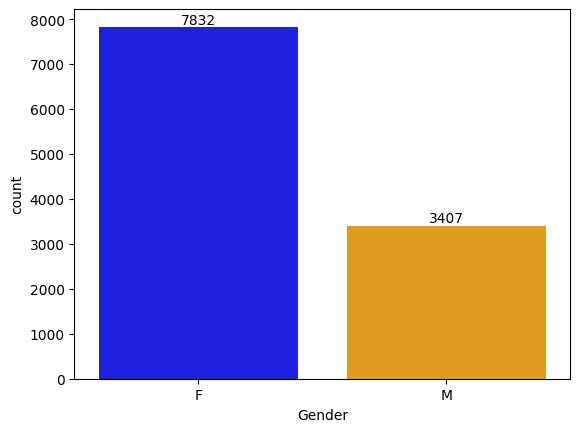

In [14]:
# plotting a bar chart for Gender and it's count

chart = sns.countplot(x='Gender', hue='Gender', data=df, palette = ['blue','orange'])

for i in chart.containers:
    chart.bar_label(i)




C:\Users\POOJA SINGH\AppData\Local\Temp\ipykernel_1588\2890277859.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'Gender',y='Amount' , data= sales_gen, palette= ['blue','orange'])


<Axes: xlabel='Gender', ylabel='Amount'>

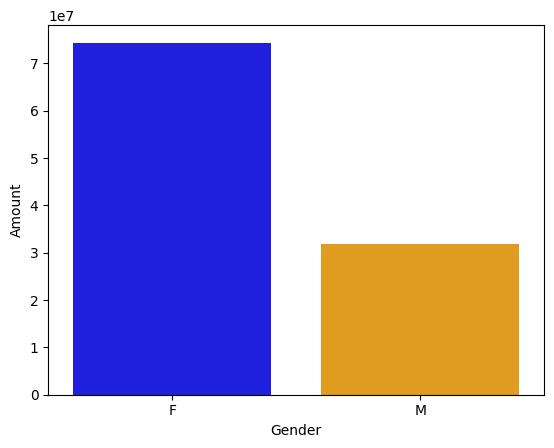

In [15]:
# plotting graph for gender vs total amount

sales_gen = df.groupby(['Gender'])['Amount'].sum().sort_values(ascending=False).reset_index()

sns.barplot(x= 'Gender',y='Amount' , data= sales_gen, palette= ['blue','orange'])



*From above graph we can see that most of buyers are females*

### AGE

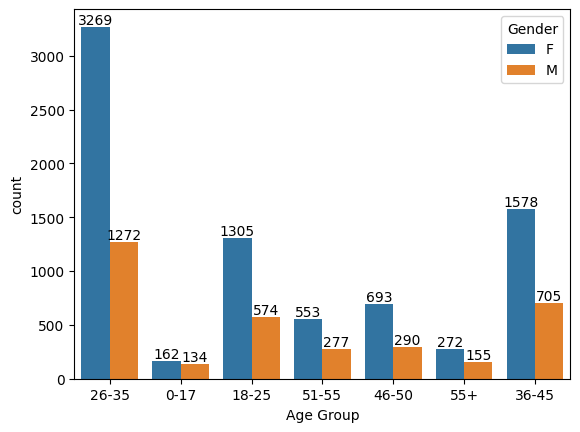

In [16]:
age_gen = sns.countplot(data= df, x = 'Age Group', hue = 'Gender')

for i in age_gen.containers:
    age_gen.bar_label(i)

<Axes: xlabel='Age Group', ylabel='Amount'>

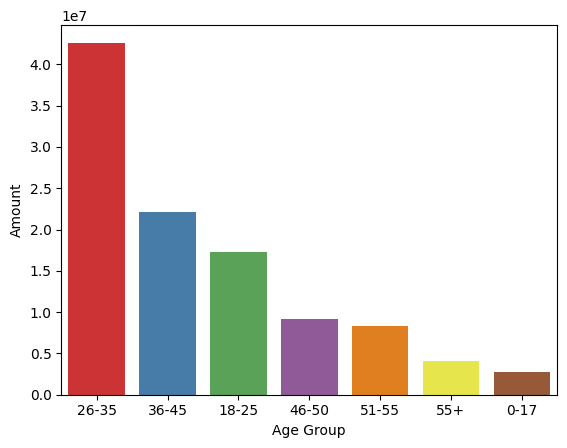

In [17]:
sales_age = df.groupby(['Age Group'])['Amount'].sum().sort_values(ascending=False).reset_index()

sns.barplot( x = 'Age Group', y = 'Amount', hue= 'Age Group', data= sales_age, palette= 'Set1')

*From above graphs we can see that most of the buyers are of age group between 26-35 yrs female*

### STATE

<Axes: xlabel='State', ylabel='Orders'>

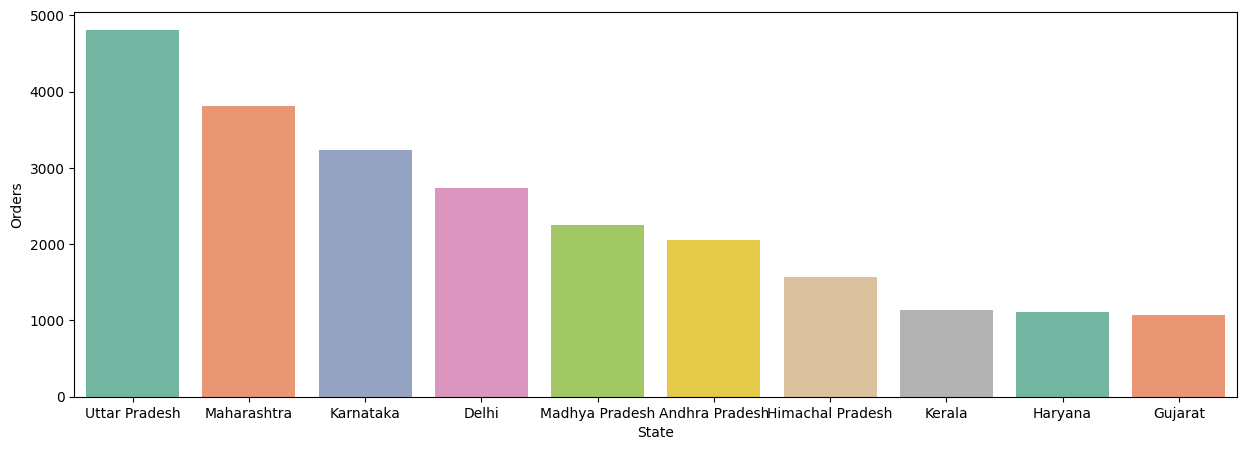

In [18]:
sale_state = df.groupby(['State'], as_index= False)['Orders'].sum().sort_values(by = 'Orders',ascending= False).head(10)
plt.figure(figsize=(15,5))
sns.barplot(data= sale_state , x = 'State', y = 'Orders',hue='State',   palette='Set2')

<Axes: xlabel='State', ylabel='Amount'>

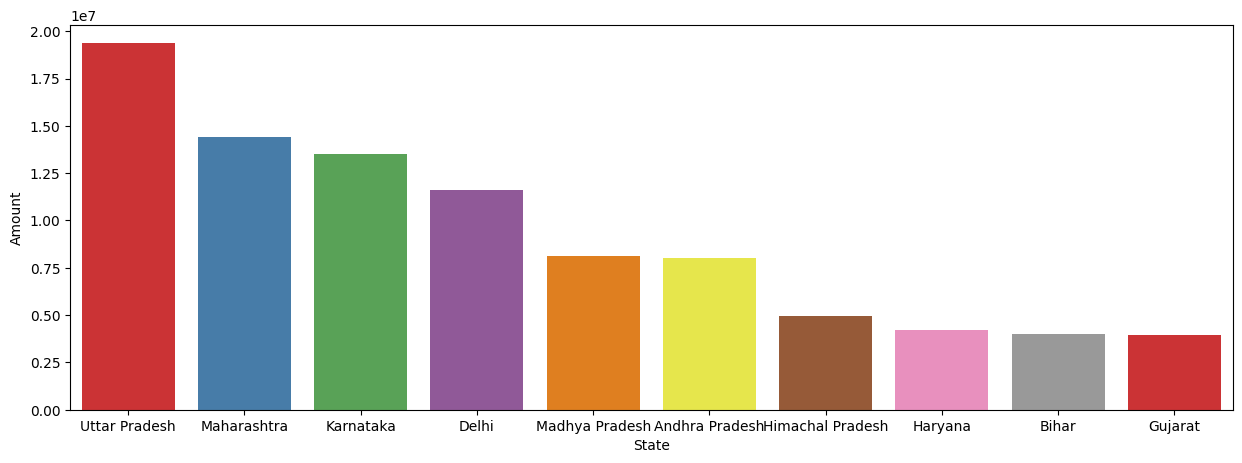

In [19]:
sale_state = df.groupby(['State'], as_index= False)['Amount'].sum().sort_values(by = 'Amount' ,ascending= False).head(10)
plt.figure(figsize=(15,5))
sns.barplot(data= sale_state, x = 'State', y= 'Amount',hue= 'State', palette='Set1')

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*


### MARITAL STATUS

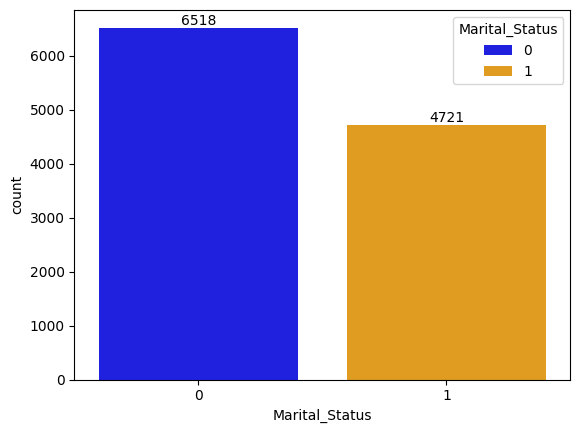

In [20]:
sales_ms = sns.countplot(data= df, x = 'Marital_Status',hue= 'Marital_Status', palette= ['Blue','Orange'])

for i in sales_ms.containers:
    sales_ms.bar_label(i)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

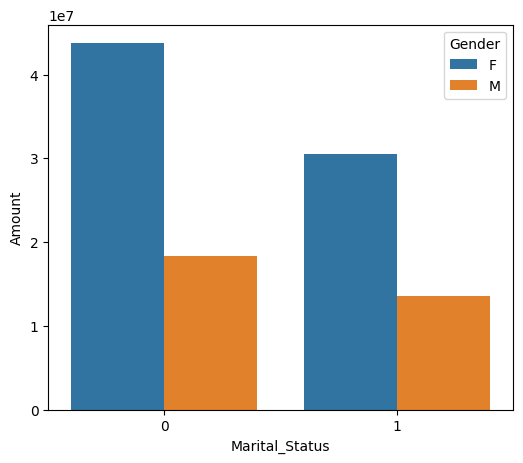

In [ ]:
plt.figure(figsize=(6,5))
sales_ms = df.groupby(['Marital_Status', 'Gender'], as_index= False)['Amount'].sum().sort_values(by = 'Amount' , ascending= False)
sns.barplot(data= sales_ms, x = 'Marital_Status', y= 'Amount', hue = 'Gender')

*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

### OCCUPATION

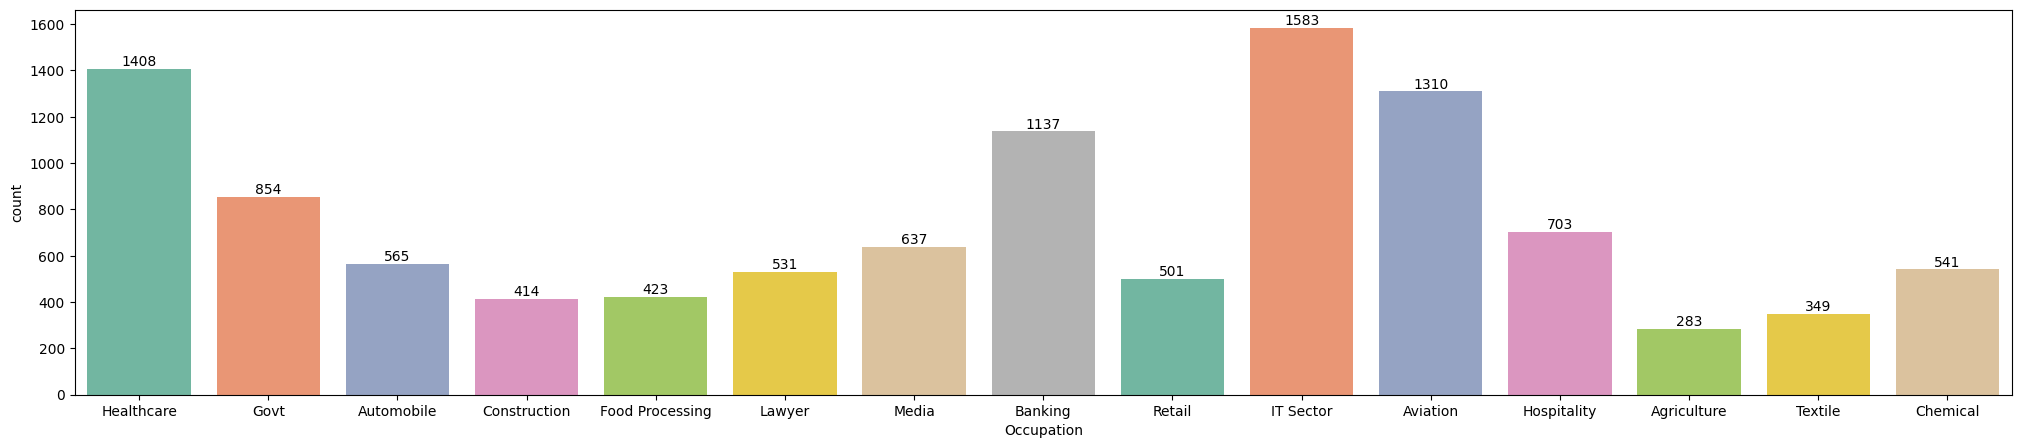

In [47]:
plt.figure(figsize=(25,5))
sales_occp = sns.countplot(data= df, x = 'Occupation',hue = 'Occupation' , palette= 'Set2')
for i in sales_occp.containers:
    sales_occp.bar_label(i)

<Axes: xlabel='Occupation', ylabel='Amount'>

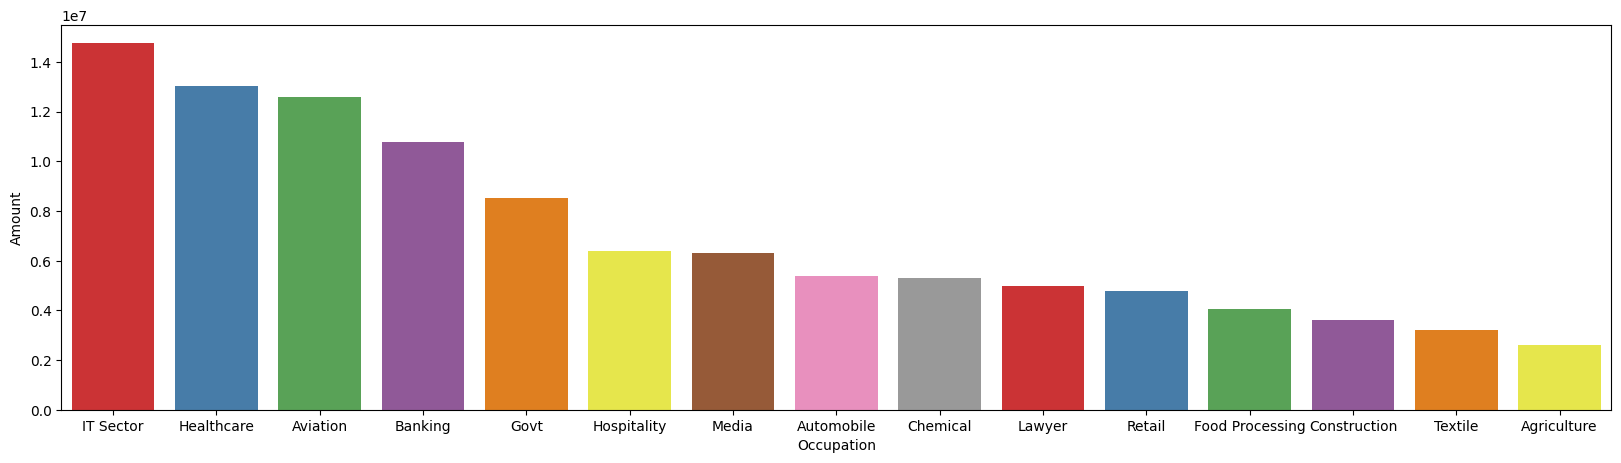

In [39]:
plt.figure(figsize=(20,5))
sales_ms = df.groupby(['Occupation'], as_index= False)['Amount'].sum().sort_values(by = 'Amount',ascending= False)
sns.barplot(data= sales_ms, x = 'Occupation', y = 'Amount', hue= 'Occupation' , palette= 'Set1')

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

### PRODUCT CATEGORY


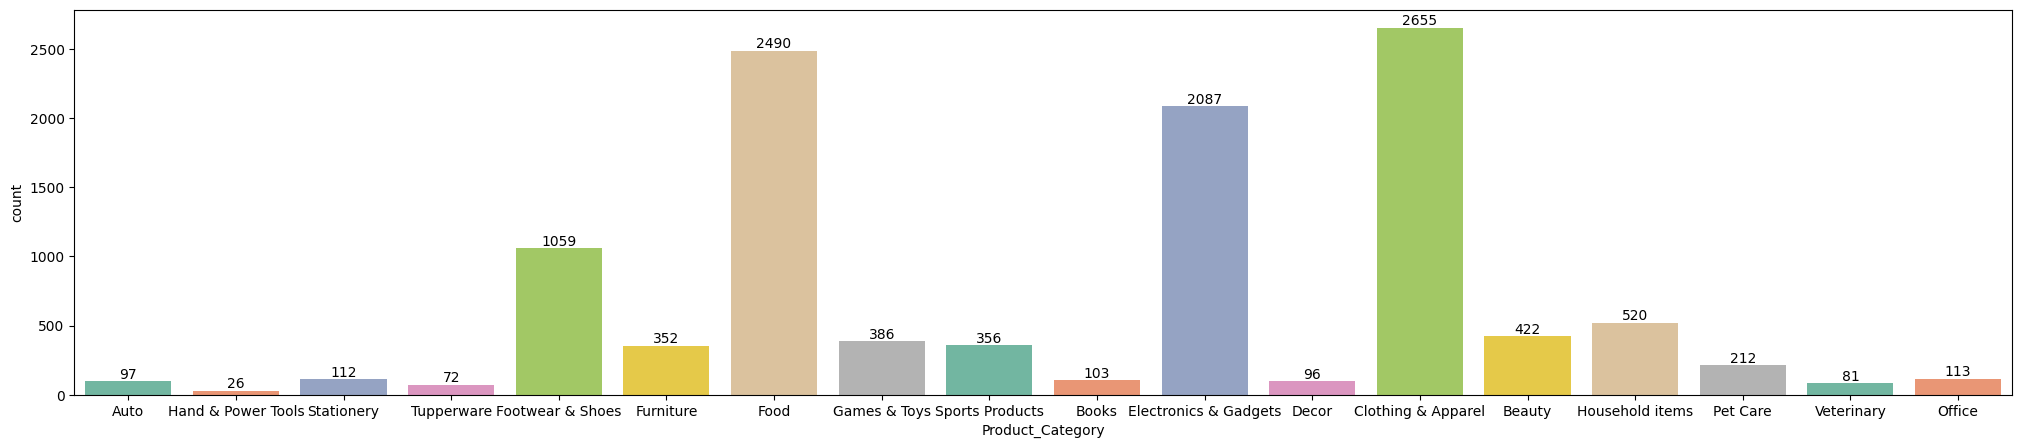

In [52]:
plt.figure(figsize=(25,5))
prd_sales = sns.countplot(data= df , x = 'Product_Category' , hue= 'Product_Category', palette= 'Set2')
for i in prd_sales.containers:
    prd_sales.bar_label(i)

C:\Users\POOJA SINGH\AppData\Local\Temp\ipykernel_1588\2040172950.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = prd_amt, x = 'Product_Category', y= 'Amount' , palette= 'Set1')


<Axes: xlabel='Product_Category', ylabel='Amount'>

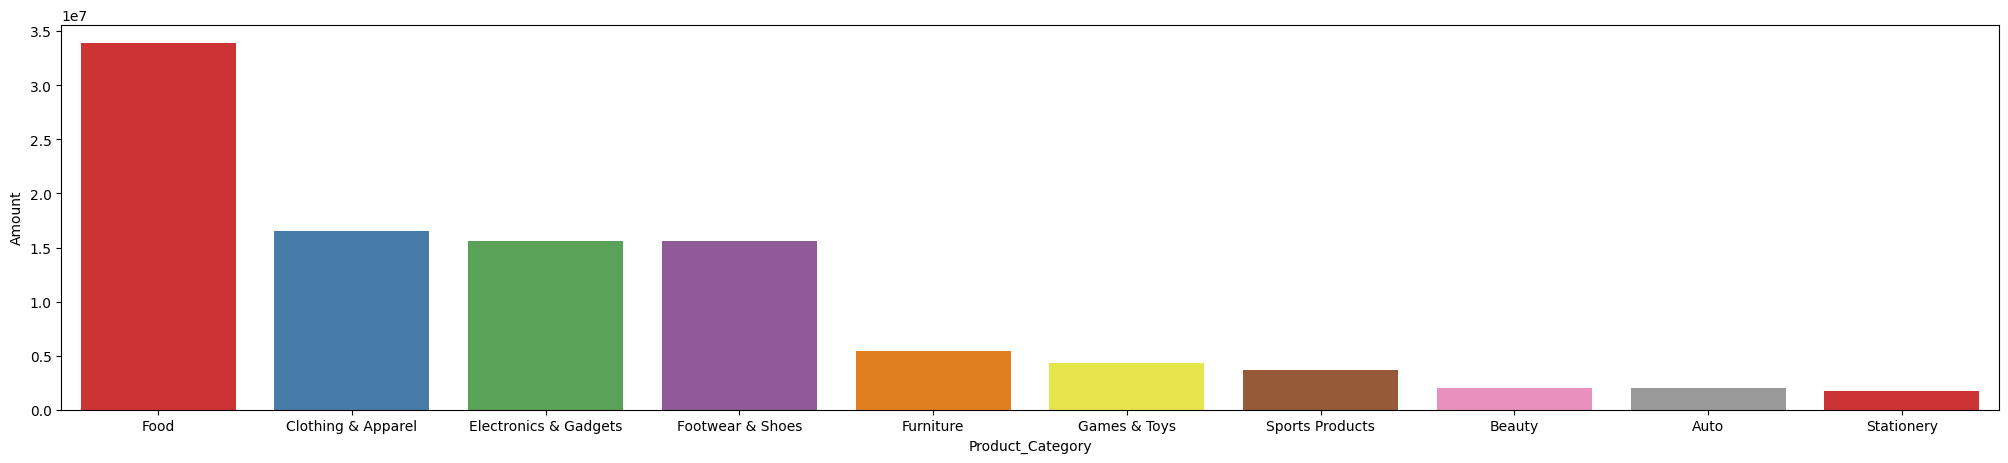

In [66]:
plt.figure(figsize=(25,5))
prd_amt = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by = 'Amount' , ascending= False).head(10)

sns.barplot(data = prd_amt, x = 'Product_Category', y= 'Amount' , palette= 'Set1')

*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

# Conclusion:


### *Married women , age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*